## Tinder Swindler 100k Tweets

In [3]:
# load the dataset
import pandas as pd

file = './TinderSwindlerVersion2.csv'
df = pd.read_csv(file)

In [4]:
df.head(10)

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
0,globalnode.saito 🟥🐳🐈‍⬛,Travelling the World on Web3,2009-06-03 20:18:22+00:00,768,False,2022-02-09 17:09:22+00:00,"@T1gmee Tinder Swindler, off Netflix",Twitter for iPhone,False
1,Ungovernable 🇧🇮,NaN,2011-09-04 22:46:26+00:00,385,False,2022-02-09 17:09:18+00:00,"#tinderswindler , basically homeboy got away w...",Twitter for iPhone,False
2,Adefolake,NaN,2009-06-02 14:18:44+00:00,1994,False,2022-02-09 17:09:17+00:00,Not the tinder swindler becoming a TIk Tok sta...,Twitter for iPhone,False
3,✧ ☽,Noord-Brabant,2012-02-12 07:35:26+00:00,336,False,2022-02-09 17:09:07+00:00,Why isn’t Shimon Hayut in jail ????? #thetinde...,Twitter for iPhone,False
4,chivo. 🥶,PG/MD,2010-03-22 21:23:17+00:00,1046,False,2022-02-09 17:09:06+00:00,the tinder swindler a sick nigga 😂😂,Twitter Web App,False
5,kira,"Toronto, Ontario",2010-07-02 12:50:53+00:00,362,False,2022-02-09 17:09:03+00:00,No those women on the Tinder swindler pissed m...,Twitter for iPhone,False
6,fogmistress698,NaN,2020-05-05 08:47:57+00:00,210,False,2022-02-09 17:08:55+00:00,This manipulation is how scammers pull you in ...,Twitter Web App,False
7,melraunch,"East, England",2019-05-24 23:18:01+00:00,3268,False,2022-02-09 17:08:45+00:00,@robertstweets1 @DistantFixed I waited for him...,Twitter for iPhone,False
8,Pamela Power,"Johannesburg, South Africa",2009-07-10 12:51:24+00:00,6306,False,2022-02-09 17:08:41+00:00,Hmmm...he's like the #tinderswindler https://t...,Twitter for Android,False
9,CaliMcCormac,NaN,2022-02-09 16:48:06+00:00,0,False,2022-02-09 17:08:40+00:00,Wow just watching the Twitter Swindler and it ...,Twitter for iPhone,False


### Data Cleansing

In [5]:
df.isna().sum()

user_name             5
user_location     18481
user_created          0
user_followers        0
user_verified         0
date                  0
text                  0
source                0
is_retweet            0
dtype: int64

In [6]:
df["user_name"].fillna('unknown', inplace=True)
df["user_location"].fillna('unknown', inplace=True)

In [7]:
df = df[df.is_retweet != True]

In [8]:
df.describe(include= "O").T

,count,unique,top,freq
user_name,76213,49767,.,196
user_location,76213,17911,unknown,18485
user_created,76213,54501,2020-10-06 00:15:38+00:00,160
date,76213,70999,2022-02-07 21:13:06+00:00,5
text,76213,75325,The Tinder Swindler,69
source,76213,210,Twitter for iPhone,47828


In [44]:
df_sample = df.sample(1000)

### Load Spacy and init stop words

In [36]:
import spacy
import re
from spacy.tokenizer import _get_regex_pattern
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

nlp = spacy.load('en_core_web_lg')

# get default pattern for tokens that don't get split
re_token_match = _get_regex_pattern(nlp.Defaults.token_match)
# add your patterns (here: hashtags and in-word hyphens)
re_token_match = f"({re_token_match}|#\w+|\w+-\w+)"

# overwrite token_match function of the tokenizer
nlp.tokenizer.token_match = re.compile(re_token_match).match

stop_words = stopwords.words('english')
stop_words.extend([])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexanderkneis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
# Remove urls from tweets
df_sample.text = df_sample.text.apply(lambda text: re.sub(r'http\S+|http', '', text))

In [96]:
# create docs list with nlp
docs = list(nlp.pipe(df_sample.text, n_process=4))

In [99]:
for token in docs[0]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)


To to PART TO aux Xx True True
watch watch VERB VB ROOT xxxx True False
this this DET DT det xxxx True True
‘ ' PUNCT `` punct ‘ False False
The the DET DT det Xxx True True
Tinder Tinder PROPN NNP nmod Xxxxx True False
Swindler Swindler PROPN NNP nmod Xxxxx True False
’ ' PUNCT '' punct ’ False False
movie movie NOUN NN dobj xxxx True False
or or CCONJ CC cc xx True True
not not PART RB conj xxx True True
? ? PUNCT . punct ? False False
🤔 🤔 SPACE _SP ROOT 🤔 False False


### Document Term Matrix

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer(stop_words=stop_words)  
vects = vect.fit_transform(df_sample.text)

# Select the first five rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:9]  
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, 10)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(10))

                   Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  \
swindler               1      0      0      1      0      1      1      2   
tinder                 1      0      0      1      0      0      1      1   
know                   0      0      0      0      0      0      1      0   
watch                  1      0      0      1      0      0      0      0   
thetinderswindler      0      1      0      0      1      0      0      0   
understand             0      0      0      0      0      0      0      0   
aéreas                 0      0      0      0      0      0      0      1   
wanted                 0      0      0      0      0      0      0      0   
wow                    0      0      0      1      0      0      0      0   
star                   0      0      1      0      0      0      0      0   

                   Doc 9  
swindler               0  
tinder                 0  
know                   1  
watch                  0  
thetinderswindler

<AxesSubplot:>

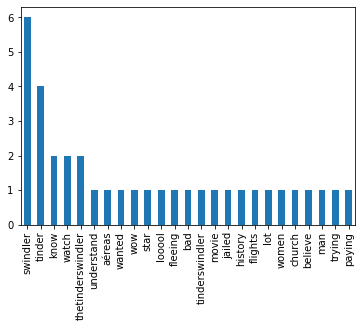

In [114]:
term_document_matrix['total_count'].plot.bar()

### Get Hashtags

In [51]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
pattern = [{"TEXT": {"REGEX": "#\w+|\w+-\w+"}}]
matcher.add('HASHTAG', [pattern])

def getHashtags(text):
    doc = nlp(text)
    matches = matcher(doc)
    hashtags = []
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        hashtags.append(span.text)
    return hashtags

In [67]:
hashtags = [item for sublist in list(df_sample.text.apply(getHashtags)) for item in sublist]

In [73]:
from collections import Counter
counter = Counter()

for tag in hashtags:
    counter[tag] += 1
counter

Counter({'#TheTinderSwindler': 160,
         '#tinderswindler': 220,
         '#usikusacco': 1,
         '#Burkina_Faso': 1,
         '#EarthquakeInMombasa': 1,
         '#Netflix': 9,
         '#movieproduction': 1,
         '#foreshadowing?': 1,
         '#TinderSwindler': 38,
         '#Bitcoin': 1,
         'defam-in-ation': 1,
         '#ghetto': 1,
         '#redflag': 1,
         '18-year-old': 1,
         '#NairobiTushaamua': 1,
         '#simonleviev': 1,
         '#GrandGlobalRevival': 1,
         '#AFCON2021': 1,
         '#EarthquakeInVihiga': 1,
         '#SENEGY': 1,
         '#twitterswindler…': 1,
         '#TheTinderSwindler…': 2,
         '#VirtualSlumberParty': 1,
         '#TinderSwindler,': 1,
         '#tinderswindler.': 3,
         '#viral': 1,
         '#Video': 1,
         '#clip': 1,
         '#TikTok': 1,
         '#StatueOfEquality…': 1,
         '#TindlerSwindler': 4,
         '#tinderswindler,': 1,
         'self-proclaimed': 1,
         '#BBMzansi': 1,
  